In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#import the countries data from the csv file with an index column of countries
df_india_arrival = pd.read_csv("india_flight_there_data.csv")
#timestamp column to datetime 
df_india_arrival['timestamp'] = pd.to_datetime(df_india_arrival['timestamp'])
df_india_arrival = df_india_arrival.resample('H', on ='timestamp', axis=0).sum()
df_india_arrival.head()


C:\Users\torip\AppData\Local\Temp\ipykernel_19236\1234190830.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_india_arrival = df_india_arrival.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\1234190830.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_india_arrival = df_india_arrival.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-11-17 16:00:00,1841,1177,2645
2023-11-17 17:00:00,3542,2491,3655
2023-11-17 18:00:00,2969,1742,2904
2023-11-17 19:00:00,95807,58034,97085
2023-11-17 20:00:00,104196,62947,105605


In [5]:
df_india_arrival["Chan_0_1_pct"] = ((df_india_arrival['Chan_0_1'] - df_india_arrival['Chan_0_1'].mean())/ 
                      df_india_arrival['Chan_0_1'].mean()*100)
df_india_arrival["Chan_0_2_pct"] = ((df_india_arrival['Chan_0_2'] - df_india_arrival['Chan_0_2'].mean())/ 
                      df_india_arrival['Chan_0_2'].mean()*100)
df_india_arrival["Chan_1_2_pct"] = ((df_india_arrival['Chan_1_2'] - df_india_arrival['Chan_1_2'].mean())/ 
                      df_india_arrival['Chan_1_2'].mean()*100)
df_india_arrival["Chan_0_1_m_avg"] = df_india_arrival.rolling('12H').Chan_0_1_pct.mean()
df_india_arrival["Chan_0_2_m_avg"] = df_india_arrival.rolling('12H').Chan_0_2_pct.mean()
df_india_arrival["Chan_1_2_m_avg"] = df_india_arrival.rolling('12H').Chan_1_2_pct.mean()

df_india_arrival.head()

#filter out first and last lines of data
#df_india_arrival = df_india_arrival.iloc[1:]
#df_india_arrival = df_india_arrival.iloc[:-1]

C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2835711031.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_india_arrival["Chan_0_1_m_avg"] = df_india_arrival.rolling('12H').Chan_0_1_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2835711031.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_india_arrival["Chan_0_2_m_avg"] = df_india_arrival.rolling('12H').Chan_0_2_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2835711031.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_india_arrival["Chan_1_2_m_avg"] = df_india_arrival.rolling('12H').Chan_1_2_pct.mean()


,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg
timestamp,,,,,,,,,
2023-11-17 16:00:00,1841,1177,2645,-94.887450,-94.644297,-92.802982,-94.887450,-94.644297,-92.802982
2023-11-17 17:00:00,3542,2491,3655,-90.163687,-88.665202,-90.054783,-92.525569,-91.654749,-91.428882
2023-11-17 18:00:00,2969,1742,2904,-91.754937,-92.073377,-92.098246,-92.268692,-91.794292,-91.652004
2023-11-17 19:00:00,95807,58034,97085,166.060873,164.072129,164.167286,-27.686300,-27.827687,-27.697181
2023-11-17 20:00:00,104196,62947,105605,189.357549,186.427754,187.350119,15.722470,15.023402,15.312279


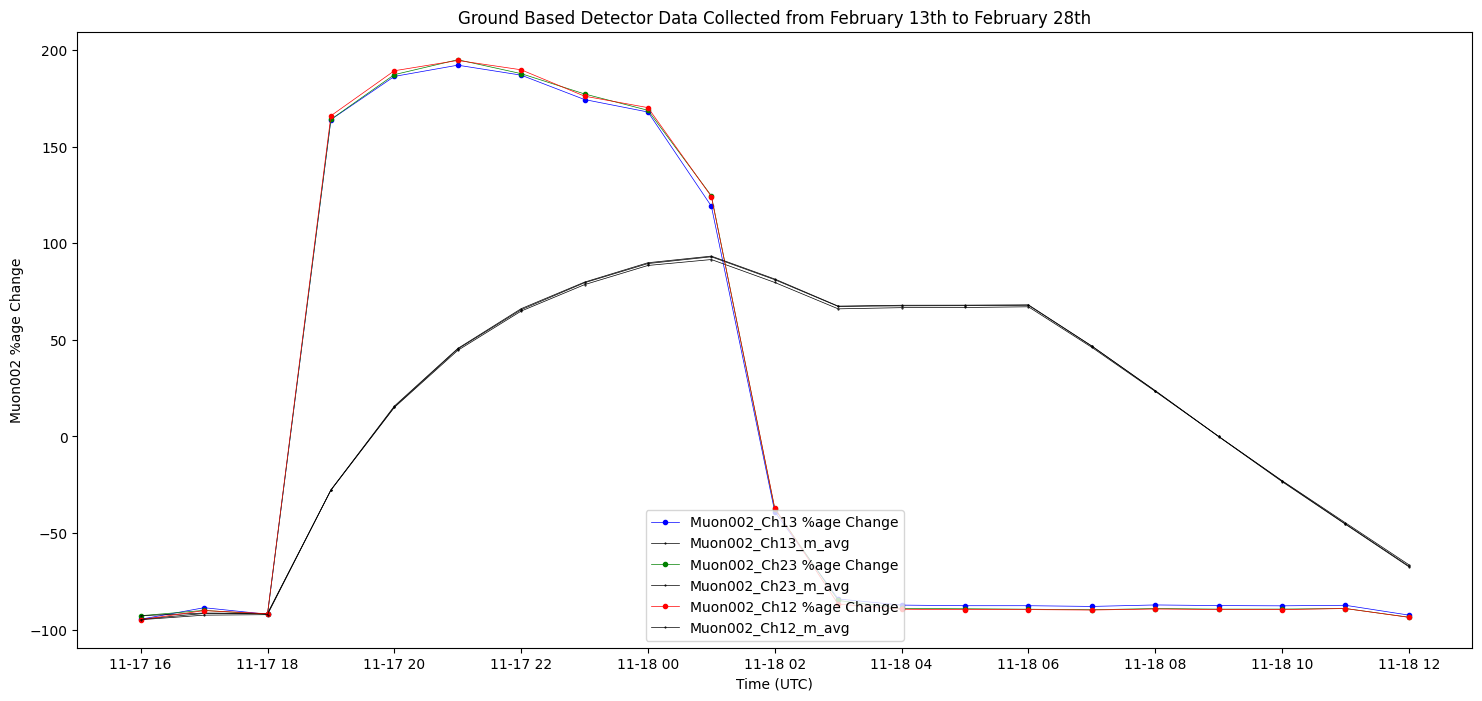

In [6]:
plt.rcParams["axes.grid"] = False
fig, (ax5) = plt.subplots(1,figsize=(18, 8))

ax5.plot(df_india_arrival["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13 %age Change')
ax5.plot(df_india_arrival["Chan_0_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_india_arrival["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23 %age Change')
ax5.plot(df_india_arrival["Chan_1_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_india_arrival["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12 %age Change')
ax5.plot(df_india_arrival["Chan_0_1_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax5.set_ylabel('Muon002 %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')


In [7]:
#import the countries data from the csv file with an index column of countries
df_ames_arrival = pd.read_csv("trip2NASA_Ames_flight_there_data.csv")
#timestamp column to datetime 
df_ames_arrival['timestamp'] = pd.to_datetime(df_ames_arrival['timestamp'])
df_ames_arrival = df_ames_arrival.resample('H', on ='timestamp', axis=0).sum()
df_ames_arrival.head()


C:\Users\torip\AppData\Local\Temp\ipykernel_19236\857416572.py:5: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_ames_arrival = df_ames_arrival.resample('H', on ='timestamp', axis=0).sum()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\857416572.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ames_arrival = df_ames_arrival.resample('H', on ='timestamp', axis=0).sum()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-06-25 22:00:00,457,328,434
2023-06-25 23:00:00,3191,2554,3003
2023-06-26 00:00:00,3100,2337,2856
2023-06-26 01:00:00,51602,35484,48149
2023-06-26 02:00:00,74872,50665,69068


In [8]:
df_ames_arrival["Chan_0_1_pct"] = ((df_ames_arrival['Chan_0_1'] - df_ames_arrival['Chan_0_1'].mean())/ 
                      df_ames_arrival['Chan_0_1'].mean()*100)
df_ames_arrival["Chan_0_2_pct"] = ((df_ames_arrival['Chan_0_2'] - df_ames_arrival['Chan_0_2'].mean())/ 
                      df_ames_arrival['Chan_0_2'].mean()*100)
df_ames_arrival["Chan_1_2_pct"] = ((df_ames_arrival['Chan_1_2'] - df_ames_arrival['Chan_1_2'].mean())/ 
                      df_ames_arrival['Chan_1_2'].mean()*100)
df_ames_arrival["Chan_0_1_m_avg"] = df_ames_arrival.rolling('12H').Chan_0_1_pct.mean()
df_ames_arrival["Chan_0_2_m_avg"] = df_ames_arrival.rolling('12H').Chan_0_2_pct.mean()
df_ames_arrival["Chan_1_2_m_avg"] = df_ames_arrival.rolling('12H').Chan_1_2_pct.mean()

df_ames_arrival.head()

C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2574515344.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ames_arrival["Chan_0_1_m_avg"] = df_ames_arrival.rolling('12H').Chan_0_1_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2574515344.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ames_arrival["Chan_0_2_m_avg"] = df_ames_arrival.rolling('12H').Chan_0_2_pct.mean()
C:\Users\torip\AppData\Local\Temp\ipykernel_19236\2574515344.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ames_arrival["Chan_1_2_m_avg"] = df_ames_arrival.rolling('12H').Chan_1_2_pct.mean()


,Chan_0_1,Chan_0_2,Chan_1_2,Chan_0_1_pct,Chan_0_2_pct,Chan_1_2_pct,Chan_0_1_m_avg,Chan_0_2_m_avg,Chan_1_2_m_avg
timestamp,,,,,,,,,
2023-06-25 22:00:00,457,328,434,-93.641937,-93.551296,-93.497321,-93.641937,-93.551296,-93.497321
2023-06-25 23:00:00,3191,2554,3003,-55.604863,-49.786614,-55.005657,-74.623400,-71.668955,-74.251489
2023-06-26 00:00:00,3100,2337,2856,-56.870910,-54.052982,-57.208178,-68.705903,-65.796964,-68.570385
2023-06-26 01:00:00,51602,35484,48149,617.918482,597.639701,621.422777,102.950193,100.062202,103.927905
2023-06-26 02:00:00,74872,50665,69068,941.664908,896.108541,934.854896,270.693136,259.271470,270.113303


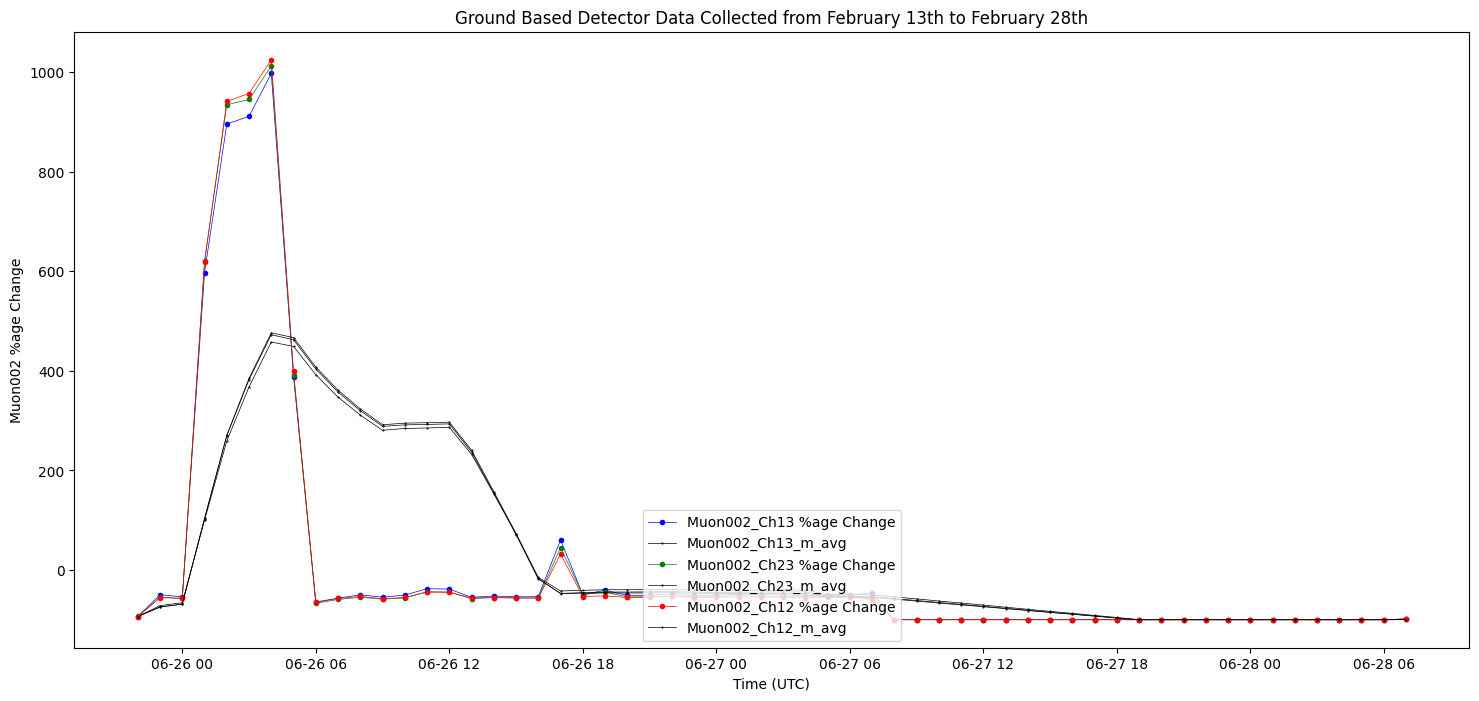

In [9]:
plt.rcParams["axes.grid"] = False
fig, (ax5) = plt.subplots(1,figsize=(18, 8))

ax5.plot(df_ames_arrival["Chan_0_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13 %age Change')
ax5.plot(df_ames_arrival["Chan_0_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch13_m_avg')
ax5.plot(df_ames_arrival["Chan_1_2_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23 %age Change')
ax5.plot(df_ames_arrival["Chan_1_2_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch23_m_avg')
ax5.plot(df_ames_arrival["Chan_0_1_pct"],
marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12 %age Change')
ax5.plot(df_ames_arrival["Chan_0_1_m_avg"],
marker='.', markersize=1, linestyle='-', linewidth=0.5, color='black', label='Muon002_Ch12_m_avg')
ax5.set_ylabel('Muon002 %age Change')
ax5.set_xlabel('Time (UTC)')
ax5.set_title('Ground Based Detector Data Collected from February 13th to February 28th')
ax5.legend(loc='lower center')
